In [127]:
%matplotlib inline

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt

In [129]:
super = pd.read_csv("Super C19.csv")
super = super.drop('Unnamed: 0', axis = 1)

k = []
for i in range(4, len(super.keys()) - 1):
    if int(super.keys()[i][5:7]) < 6:
        k.append(i)

for i in range(4, len(super.keys()) - 1):
    if int(super.keys()[i][:4]) != 2022:
        k.append(i)

MC = super.keys().get_loc('2022-05-31,1cases')
MD = super.keys().get_loc('2022-05-31,2deaths')

k.remove(864)
k.remove(1955)

super = super.drop(super.columns[k], axis = 1)
super

,countyFIPS,County Name,State,StateFIPS,"2022-05-31,1cases","2022-06-01,1cases","2022-06-02,1cases","2022-06-03,1cases","2022-06-04,1cases","2022-06-05,1cases",...,"2022-12-23,2deaths","2022-12-24,2deaths","2022-12-25,2deaths","2022-12-26,2deaths","2022-12-27,2deaths","2022-12-28,2deaths","2022-12-29,2deaths","2022-12-30,2deaths","2022-12-31,2deaths",population
0,1001,Autauga County,AL,1,15963,15969,15978,15978,15978,15978,...,230,230,230,230,230,230,230,230,230,55869
1,1003,Baldwin County,AL,1,56512,56580,56648,56648,56648,56648,...,719,719,719,719,719,719,719,719,719,223234
2,1005,Barbour County,AL,1,5707,5710,5714,5714,5714,5714,...,103,103,103,103,103,103,103,103,103,24686
3,1007,Bibb County,AL,1,6500,6508,6512,6512,6512,6512,...,108,108,108,108,108,108,108,108,108,22394
4,1009,Blount County,AL,1,15073,15077,15084,15084,15084,15084,...,260,260,260,260,260,260,260,260,260,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Sweetwater County,WY,56,11178,11178,11178,11178,11178,11178,...,136,136,136,136,136,136,136,136,136,42343
3138,56039,Teton County,WY,56,10229,10229,10229,10229,10229,10229,...,16,16,16,16,16,16,16,16,16,23464
3139,56041,Uinta County,WY,56,5681,5681,5681,5681,5681,5681,...,43,43,43,43,43,43,43,43,43,20226
3140,56043,Washakie County,WY,56,2369,2369,2369,2369,2369,2369,...,47,47,47,47,47,47,47,47,47,7805


In [130]:
Arizona = super[super.State == "AZ"]
AZdates = Arizona.drop(['countyFIPS', 'County Name', 'State', 'StateFIPS', 'population'], axis = 1).sum()

AZ_Cases = []
for i in range(len(AZdates.keys())):
    if str(AZdates.keys()[i][11:13]) != "2d":
        AZ_Cases.append(AZdates[i])

#Getting the new cases
NewAZ_Cases = []
for i in reversed(range(len(AZ_Cases))):
    ANC = AZ_Cases[i] - AZ_Cases[i - 1]
    NewAZ_Cases.insert(0, ANC)

NewAZ_Cases.pop(0)
print(NewAZ_Cases)

[13042, 0, 0, 0, 0, 0, 0, 14677, 0, 0, 0, 0, 0, 0, 16324, 0, 0, 0, 0, 0, 0, 15383, 0, 0, 0, 0, 0, 0, 16514, 0, 0, 0, 0, 0, 0, 20198, 0, 0, 0, 0, 0, 0, 15280, 0, 0, 0, 0, 0, 0, 21135, 0, 0, 0, 0, 0, 0, 14249, 0, 0, 0, 0, 0, 0, 15034, 0, 0, 0, 0, 0, 0, 13501, 0, 0, 0, 0, 0, 0, 12244, 0, 0, 0, 0, 0, 0, 8505, 0, 0, 0, 0, 0, 0, 8661, 0, 0, 0, 0, 0, 0, 3666, 0, 0, 0, 0, 0, 0, 6119, 0, 0, 0, 0, 0, 0, 3999, 0, 0, 0, 0, 0, 0, 3402, 0, 0, 0, 0, 0, 0, 3675, 0, 0, 0, 0, 0, 0, 2400, 0, 0, 0, 0, 0, 0, 5438, 0, 0, 0, 0, 0, 0, 4813, 0, 0, 0, 0, 0, 0, 3129, 0, 0, 0, 0, 0, 0, 9360, 0, 0, 0, 0, 0, 0, 10775, 0, 0, 0, 0, 0, 0, 13410, 0, 0, 0, 0, 0, 0, 12987, 0, 0, 0, 0, 0, 0, 0, 0, 15983, 0, 0, 0, 0, 0, 0, 11550, 0, 0, 0, 0, 8381, 0, 0, 0, 0, 0, 0, 0, 0, 3873, 0]


In [131]:
#Getting the weekly sum data

AZC_weekly = []
for i in range(0, len(NewAZ_Cases), 7):
    divide = slice(i, i + 7, 1)
    AZC_weekly.append(NewAZ_Cases[divide])
print(AZC_weekly)

AZWeekly_sum = []
for i in range(0, len(AZC_weekly)):
    sum = np.sum(AZC_weekly[i])
    AZWeekly_sum.append(sum)
print(AZWeekly_sum)

[[13042, 0, 0, 0, 0, 0, 0], [14677, 0, 0, 0, 0, 0, 0], [16324, 0, 0, 0, 0, 0, 0], [15383, 0, 0, 0, 0, 0, 0], [16514, 0, 0, 0, 0, 0, 0], [20198, 0, 0, 0, 0, 0, 0], [15280, 0, 0, 0, 0, 0, 0], [21135, 0, 0, 0, 0, 0, 0], [14249, 0, 0, 0, 0, 0, 0], [15034, 0, 0, 0, 0, 0, 0], [13501, 0, 0, 0, 0, 0, 0], [12244, 0, 0, 0, 0, 0, 0], [8505, 0, 0, 0, 0, 0, 0], [8661, 0, 0, 0, 0, 0, 0], [3666, 0, 0, 0, 0, 0, 0], [6119, 0, 0, 0, 0, 0, 0], [3999, 0, 0, 0, 0, 0, 0], [3402, 0, 0, 0, 0, 0, 0], [3675, 0, 0, 0, 0, 0, 0], [2400, 0, 0, 0, 0, 0, 0], [5438, 0, 0, 0, 0, 0, 0], [4813, 0, 0, 0, 0, 0, 0], [3129, 0, 0, 0, 0, 0, 0], [9360, 0, 0, 0, 0, 0, 0], [10775, 0, 0, 0, 0, 0, 0], [13410, 0, 0, 0, 0, 0, 0], [12987, 0, 0, 0, 0, 0, 0], [0, 0, 15983, 0, 0, 0, 0], [0, 0, 11550, 0, 0, 0, 0], [8381, 0, 0, 0, 0, 0, 0], [0, 0, 3873, 0]]
[13042, 14677, 16324, 15383, 16514, 20198, 15280, 21135, 14249, 15034, 13501, 12244, 8505, 8661, 3666, 6119, 3999, 3402, 3675, 2400, 5438, 4813, 3129, 9360, 10775, 13410, 12987, 15983, 

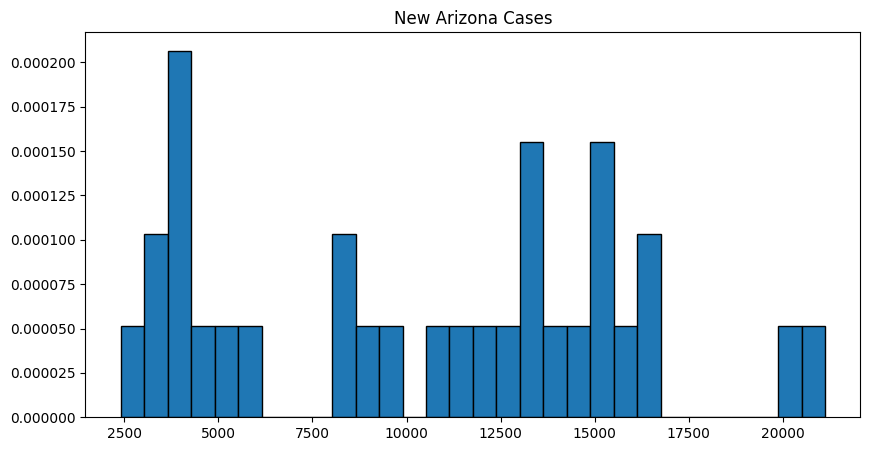

In [132]:
plt.figure(figsize =(10, 5))
plt.title("New Arizona Cases")
plt.hist(AZWeekly_sum, 30, density=True, ec='black')
plt.show()

Mean is: 10571.193548387097
Variance is: 29344609
Skewness is: 0.026841729987015023
Kurtosis is: -1.1129073757375445


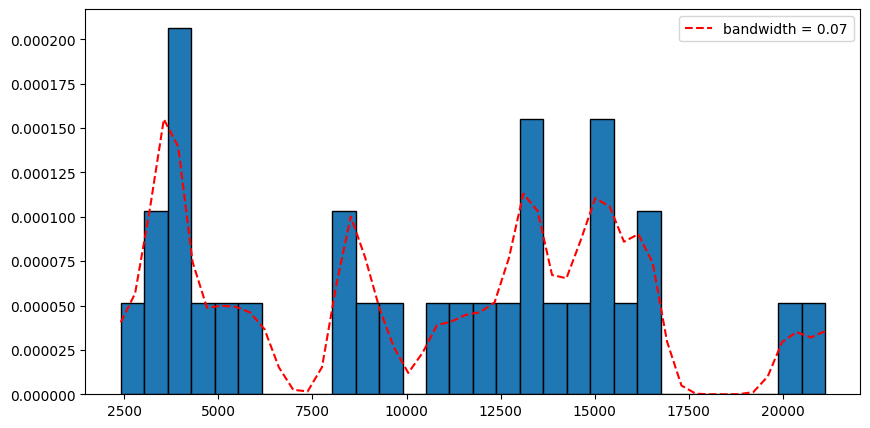

In [133]:
#Kernel Density Estimators (KDE)

bandwidth =  [0.07]
kde = [stats.gaussian_kde(AZWeekly_sum, bw_method=bw) for bw in bandwidth]
plt.figure(figsize=(10,5))

plt.hist(AZWeekly_sum, 30, density=True, ec='black')

line = np.linspace(min(AZWeekly_sum),max(AZWeekly_sum))
plt.plot(line, kde[0](line), "r--", label='bandwidth = 0.07')
plt.legend()

print("Mean is:", np.mean(AZWeekly_sum))

print("Variance is:", (statistics.variance(AZWeekly_sum)))

print("Skewness is:", stats.skew(AZWeekly_sum, axis=0, bias=True))

print("Kurtosis is:", stats.kurtosis(AZWeekly_sum, axis=0, bias=True))

Now that the distribution has been plotted, let's analyize it. The distribution for Arizona most closely resembles that of a poisson distribution. It would seem that the mean or center is around 10,571 cases. The variance seems to be 29344609. The distribution is positively skewed. The kurtosis of the distribution is playkurtic.

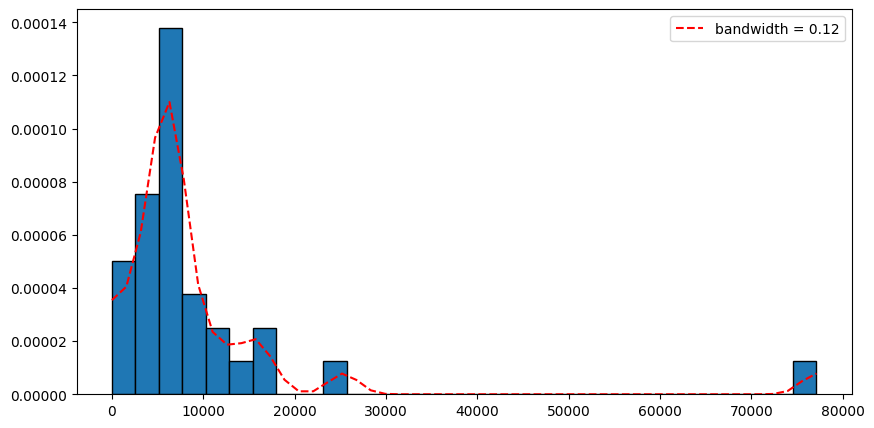

In [134]:
#Colorado

Colorado = super[super.State == "CO"]
COdates = Colorado.drop(['countyFIPS', 'County Name', 'State', 'StateFIPS', 'population'], axis = 1).sum()

CO_Cases = []
for i in range(len(COdates.keys())):
    if str(COdates.keys()[i][11:13]) != "2d":
        CO_Cases.append(COdates[i])
#Getting the new cases and deaths
NewCO_Cases = []
for i in reversed(range(len(CO_Cases))):
    CNC = CO_Cases[i] - CO_Cases[i - 1]
    NewCO_Cases.insert(0, CNC)
NewCO_Cases.pop(0)

#Getting the weekly sum data

COC_weekly = []
for i in range(0, len(NewCO_Cases), 7):
    divide = slice(i, i + 7, 1)
    COC_weekly.append(NewCO_Cases[divide])

COWeekly_sum = []
for i in range(0, len(COC_weekly)):
    sum = np.sum(COC_weekly[i])
    COWeekly_sum.append(sum)

bandwidth =  [0.12]
kde = [stats.gaussian_kde(COWeekly_sum, bw_method=bw) for bw in bandwidth]
plt.figure(figsize=(10,5))

plt.hist(COWeekly_sum, 30, density=True, ec='black')

line = np.linspace(min(COWeekly_sum),max(COWeekly_sum))
plt.plot(line, kde[0](line), "r--", label='bandwidth = 0.12')
plt.legend()

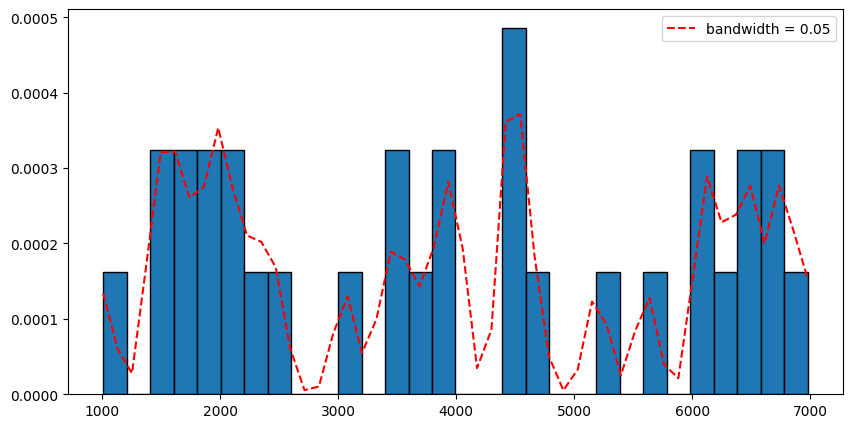

In [135]:
#New Mexico

NewMex = super[super.State == "NM"]
NMdates = NewMex.drop(['countyFIPS', 'County Name', 'State', 'StateFIPS', 'population'], axis = 1).sum()

NM_Cases = []
for i in range(len(NMdates.keys())):
    if str(NMdates.keys()[i][11:13]) != "2d":
        NM_Cases.append(NMdates[i])
#Getting the new cases and deaths
NewNM_Cases = []
for i in reversed(range(len(NM_Cases))):
    NNC = NM_Cases[i] - NM_Cases[i - 1]
    NewNM_Cases.insert(0, NNC)
NewNM_Cases.pop(0)

#Getting the weekly sum data

NMC_weekly = []
for i in range(0, len(NewNM_Cases), 7):
    divide = slice(i, i + 7, 1)
    NMC_weekly.append(NewNM_Cases[divide])

NMWeekly_sum = []
for i in range(0, len(NMC_weekly)):
    sum = np.sum(NMC_weekly[i])
    NMWeekly_sum.append(sum)

bandwidth =  [0.05]
kde = [stats.gaussian_kde(NMWeekly_sum, bw_method=bw) for bw in bandwidth]
plt.figure(figsize=(10,5))

plt.hist(NMWeekly_sum, 30, density=True, ec='black')

line = np.linspace(min(NMWeekly_sum),max(NMWeekly_sum))
plt.plot(line, kde[0](line), "r--", label='bandwidth = 0.05')
plt.legend()

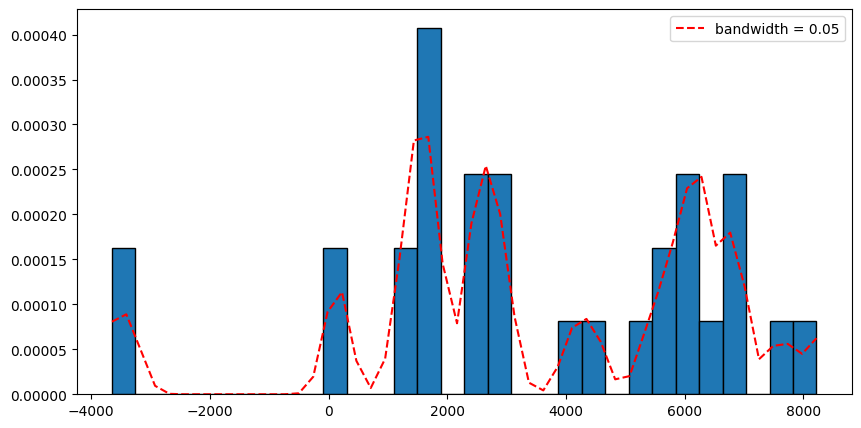

In [136]:
#Generating the data for Utah

Utah = super[super.State == "UT"]
UTdates = Utah.drop(['countyFIPS', 'County Name', 'State', 'StateFIPS', 'population'], axis = 1).sum()

UT_Cases = []
for i in range(len(UTdates.keys())):
    if str(UTdates.keys()[i][11:13]) != "2d":
        UT_Cases.append(UTdates[i])
#Getting the new cases and deaths
NewUT_Cases = []
for i in reversed(range(len(UT_Cases))):
    UNC = UT_Cases[i] - UT_Cases[i - 1]
    NewUT_Cases.insert(0, UNC)
NewUT_Cases.pop(0)

#Getting the weekly sum data

UTC_weekly = []
for i in range(0, len(NewUT_Cases), 7):
    divide = slice(i, i + 7, 1)
    UTC_weekly.append(NewUT_Cases[divide])

UTWeekly_sum = []
for i in range(0, len(UTC_weekly)):
    sum = np.sum(UTC_weekly[i])
    UTWeekly_sum.append(sum)

bandwidth =  [0.07]
kde = [stats.gaussian_kde(UTWeekly_sum, bw_method=bw) for bw in bandwidth]
plt.figure(figsize=(10,5))

plt.hist(UTWeekly_sum, 30, density=True, ec='black')

line = np.linspace(min(UTWeekly_sum),max(UTWeekly_sum))
plt.plot(line, kde[0](line), "r--", label='bandwidth = 0.05')
plt.legend()

Now that the other 3 State datas have been distributed, let's compare them to Arizona. It would seem that both New Mexico and Utah look very similar to Arizona distribution wise in that they resemble poisson distributions. However, it seems that only Colorado is the outlier here as it more closely resembles an exponential distribution instead. This could imply that Arizona, New Mexico, and Utah all shared similar trends of new covid cases throughout the year, while Colorado had a decrease in new cases near the end of the year.

In [137]:
em = pd.read_csv("2022.q1-q3.singlefile.csv")
employ = em[em.area_fips == 4000] #For Arizona
employ

C:\Users\andyl\AppData\Local\Temp\ipykernel_15292\3537542254.py:1: DtypeWarning: Columns (0,7,16) have mixed types. Specify dtype option on import or set low_memory=False.
  em = pd.read_csv("2022.q1-q3.singlefile.csv")


,area_fips,own_code,industry_code,agglvl_code,size_code,year,qtr,disclosure_code,qtrly_estabs,month1_emplvl,...,oty_month3_emplvl_chg,oty_month3_emplvl_pct_chg,oty_total_qtrly_wages_chg,oty_total_qtrly_wages_pct_chg,oty_taxable_qtrly_wages_chg,oty_taxable_qtrly_wages_pct_chg,oty_qtrly_contributions_chg,oty_qtrly_contributions_pct_chg,oty_avg_wkly_wage_chg,oty_avg_wkly_wage_pct_chg
250683,4000,0,10,50,0,2022,1,NaN,197015,3015928,...,151550,5.2,5835655603,13.6,1277081831,8.6,-103158097,-33.2,89,7.8
250684,4000,0,10,50,0,2022,2,NaN,201582,3066971,...,104529,3.6,4760802475,11.0,236755095,7.1,-22507439,-31.2,68,5.9
250685,4000,0,10,50,0,2022,3,NaN,205366,2975010,...,115097,3.9,5307758668,12.0,209338285,7.6,-18103062,-29.3,89,7.7
250686,4000,1,10,51,0,2022,1,NaN,795,55903,...,-922,-1.6,24895323,2.3,0,0.0,0,0.0,59,4.0
250687,4000,1,10,51,0,2022,2,NaN,797,56354,...,-1299,-2.2,50419121,4.0,0,0.0,0,0.0,104,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259318,4000,5,999999,58,0,2022,2,NaN,6334,7536,...,5614,130.2,74270901,138.5,19650110,191.7,420795,216.9,69,6.6
259319,4000,5,999999,58,0,2022,3,NaN,9428,12293,...,11489,221.6,161725843,262.5,37392238,273.9,767032,283.9,142,13.7
259320,4000,8,10,96,0,2022,1,NaN,2774,389083,...,2538,0.7,309769339,5.7,11063367,6.8,-2063223,-74.0,53,4.9
259321,4000,8,10,96,0,2022,2,NaN,2789,393954,...,-1652,-0.5,472559165,7.8,6758808,27.6,-329147,-65.0,92,7.5


Unfortunately, my enrichment data only covers quarter 1-3 of the year 2022 and so I am unable to use any data for the rest of that year.

In [138]:
employ_data = employ.drop(employ.columns[[0, 1, 2, 3, 4, 5, 7, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]], axis=1)
super_employ = employ_data[employ_data['qtr'] == 3]
super_employ['3rd qtr_emplvl'] = super_employ['month1_emplvl'] + super_employ['month2_emplvl'] + super_employ['month3_emplvl']
super_employ

C:\Users\andyl\AppData\Local\Temp\ipykernel_15292\3437278182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_employ['3rd qtr_emplvl'] = super_employ['month1_emplvl'] + super_employ['month2_emplvl'] + super_employ['month3_emplvl']


,qtr,qtrly_estabs,month1_emplvl,month2_emplvl,month3_emplvl,total_qtrly_wages,3rd qtr_emplvl
250685,3,205366,2975010,3058749,3080570,49425515718,9114329
250688,3,767,56378,56690,56541,1259781707,169609
250691,3,767,56378,56690,56541,1259781707,169609
250694,3,277,10479,10383,10391,185617549,31253
250697,3,2,9,8,7,104778,24
...,...,...,...,...,...,...,...
259310,3,9428,12293,14693,16673,223337057,43659
259313,3,9428,12293,14693,16673,223337057,43659
259316,3,9428,12293,14693,16673,223337057,43659
259319,3,9428,12293,14693,16673,223337057,43659


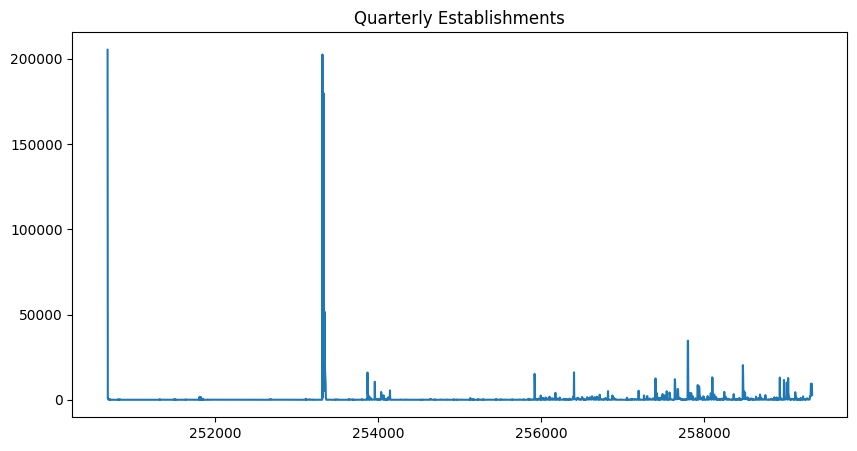

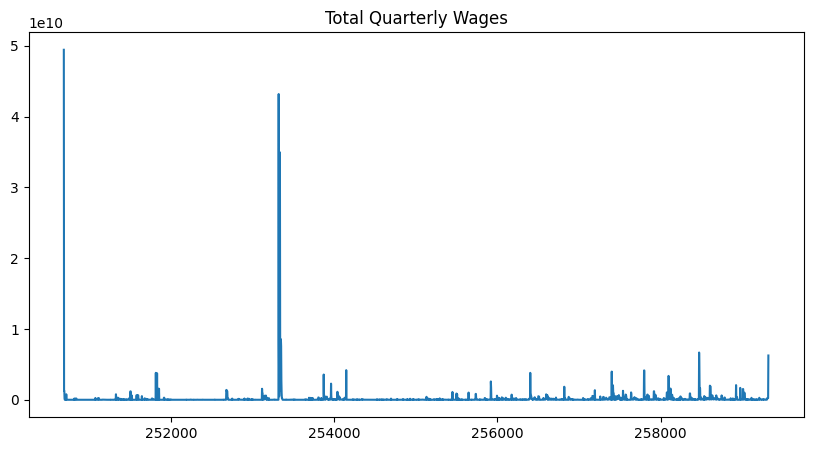

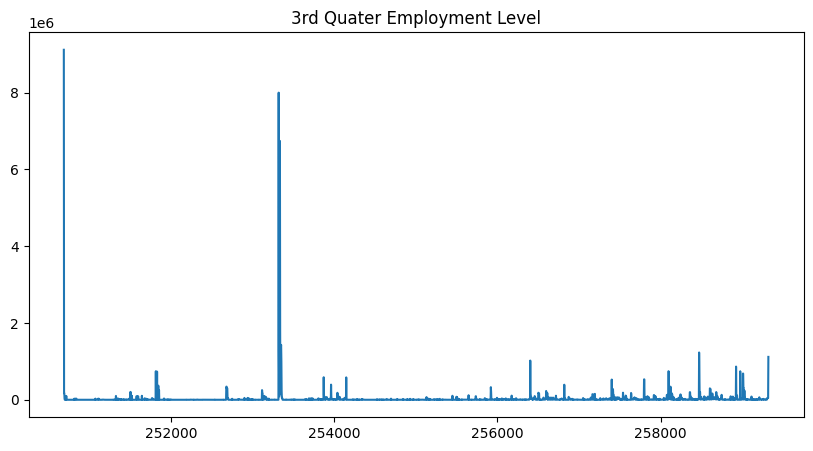

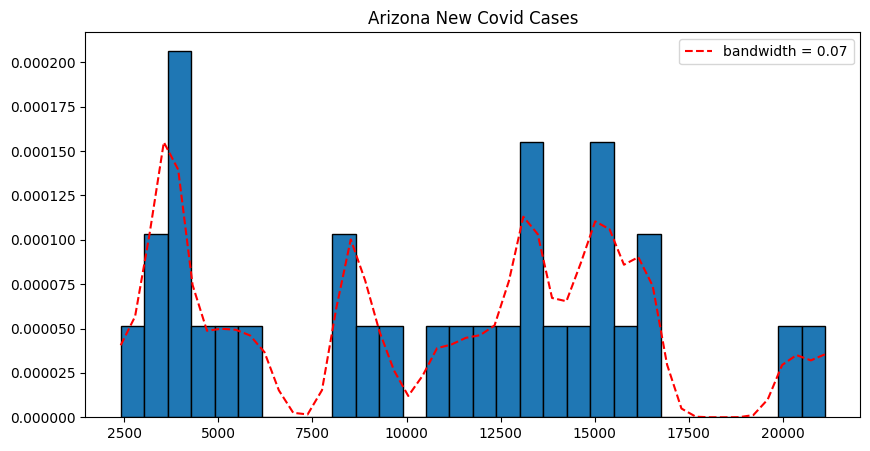

In [139]:
#Enrichment Data
plt.figure(figsize=(10,5))
plt.title("Quarterly Establishments")
plt.plot(super_employ['qtrly_estabs'])

plt.figure(figsize=(10,5))
plt.title("Total Quarterly Wages")
plt.plot(super_employ['total_qtrly_wages'])

plt.figure(figsize=(10,5))
plt.title("3rd Quater Employment Level")
plt.plot(super_employ['3rd qtr_emplvl'])

#Arizona Cases
bandwidth =  [0.07]
kde = [stats.gaussian_kde(AZWeekly_sum, bw_method=bw) for bw in bandwidth]
plt.figure(figsize=(10,5))
plt.title("Arizona New Covid Cases")
plt.hist(AZWeekly_sum, 30, density=True, ec='black')

line = np.linspace(min(AZWeekly_sum),max(AZWeekly_sum))
plt.plot(line, kde[0](line), "r--", label='bandwidth = 0.07')
plt.legend()

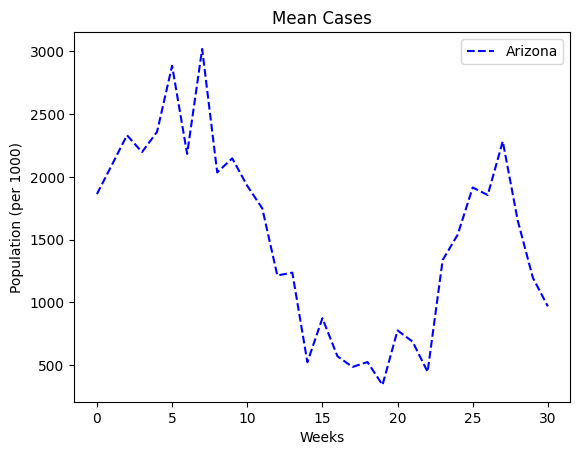

In [140]:
#Arizona Weekly Mean
AZCa = []
for i in AZC_weekly:
    AZC_weeklymeans = np.mean(i)
    AZCa.append(AZC_weeklymeans)

plt.plot(AZCa, 'b--', label='Arizona')
plt.legend()
plt.title("Mean Cases")
plt.xlabel("Weeks")
plt.ylabel("Population (per 1000)")
plt.show()

Forming Hypothesis

1. Does more establishments in a given area cause a higher chance of new covid cases?
2. Does higher wages lead to more new cases as people spend more time working around others?
3. Does a higher employment level lead to increased risk of new cases?